In [1]:
# Bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [60]:
## ---------------- FUNCÕES UTILIZADAS -----------------------

def function(x, z):
    y = 0

    for i, j in enumerate(z):
        y += pow(x, len(z) - i - 1) * j

    return y


def aproxima(x, y, grau):
    z = np.polyfit(x, y, grau)
    p = np.poly1d(z)

    return z, p


def plot_function(x, y, titulo, labelx, labely, calc_x, calc_y, p):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, linewidth=5, label="Documentacao")
    plt.plot(x, p(x), linewidth=2, linestyle="--", label="Aproximado")
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(titulo)
    plt.yticks(np.arange(0, 100, 10))
    plt.plot(
        calc_x,
        calc_y,
        color="r",
        marker="o",
        linewidth=2,
        ms=10,
        markeredgecolor="k",
        label="Medida 2022",
    )
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_historico_parametro(x_list, y_list, x_label, y_label, titulo, color):
    plt.figure(figsize=(8, 6))
    plt.plot(x_list, y_list, marker="o", markeredgecolor="k", color=color)
    plt.title(titulo)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()


def plot_historico_total(x_list, y_list, y_list_q, y1_label, y2_label, titulo):
    # create figure and axis objects with subplots()
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (12, 8)

    # Eixo 1
    ax.scatter(
        x_list,
        y_list,
        color="blue",
        marker="o",
        edgecolors="k",
    )
    ax.set_xlabel("tempo (anos)", fontsize=14)
    ax.set_ylabel(y1_label, color="blue", fontsize=14)
    plt.grid(True)

    # Eixo 2
    ax2 = ax.twinx()
    ax2.plot(x_list, y_list_q, color="red", marker="o", markeredgecolor="k")
    ax2.set_ylabel(y2_label, color="red", fontsize=14)

    plt.xticks(np.arange(2012, 2023, 1))
    fig.autofmt_xdate(rotation=45)
    plt.title(titulo)
    plt.grid(True)

    # PLOT
    fig.tight_layout()
    plt.show()


# GLOBAL:
tempo = np.arange(2012, 2023, 1)

## Coliformes Fecais  (i = 1)

---

In [61]:
df_Coliformes = pd.read_csv("Coliformes.csv", names=["X", "Y"])

X_colifomres = list(df_Coliformes["X"])
Y_coliformes = list(df_Coliformes["Y"])

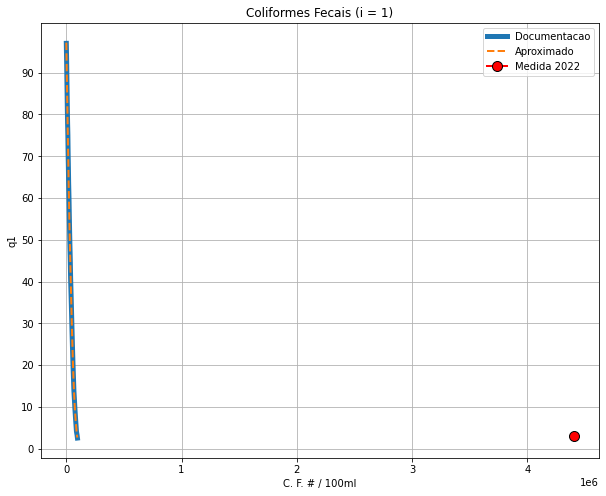

In [62]:
z, p = aproxima(X_colifomres, Y_coliformes, 8)

q1_list = []
qColiformes_list = [
    1100000.0,
    830000.0,
    1100000.0,
    1600000.0,
    1400000.0,
    2800000.0,
    1200000.0,
    15000000.0,
    850000.0,
    1300000.0,
    4400000.0,
]

for i in qColiformes_list:
    q1_list.append(function(i, z))

# Nota: se C. F. > 10⁵, q1 = 3,0
# Corrigindo:

for i, j in enumerate(qColiformes_list):
    if j > 100000:
        q1_list[i] = 3.0

plot_function(
    X_colifomres,
    Y_coliformes,
    "Coliformes Fecais (i = 1)",
    "C. F. # / 100ml",
    "q1",
    qColiformes_list[-1],
    q1_list[-1],
    p,
)

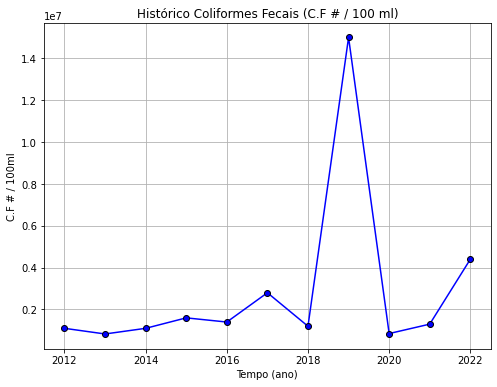

In [63]:
plot_historico_parametro(
    tempo,
    qColiformes_list,
    "Tempo (ano)",
    "C.F # / 100ml",
    "Histórico Coliformes Fecais (C.F # / 100 ml)",
    "b",
)

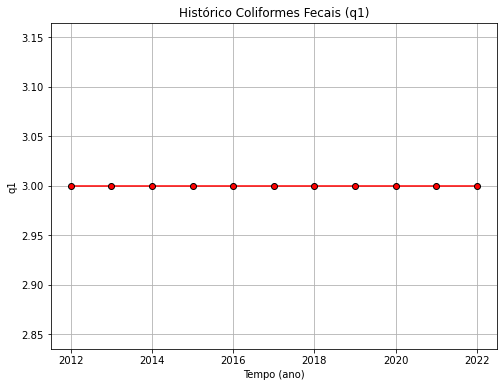

In [6]:
plot_historico_parametro(
    tempo, q1_list, "Tempo (ano)", "q1", "Histórico Coliformes Fecais (q1)", "r"
)

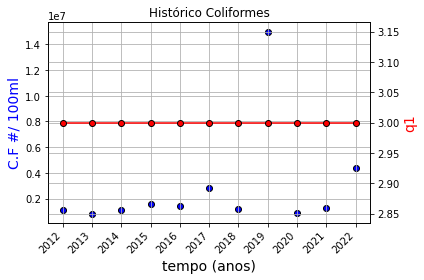

In [7]:
plot_historico_total(
    tempo, qColiformes_list, q1_list, "C.F #/ 100ml", "q1", "Histórico Coliformes"
)

## PH  (i = 2)

---

In [8]:
df_pH = pd.read_csv("pH.csv", names=["X", "Y"])

X_pH = list(df_pH["X"])
Y_pH = list(df_pH["Y"])

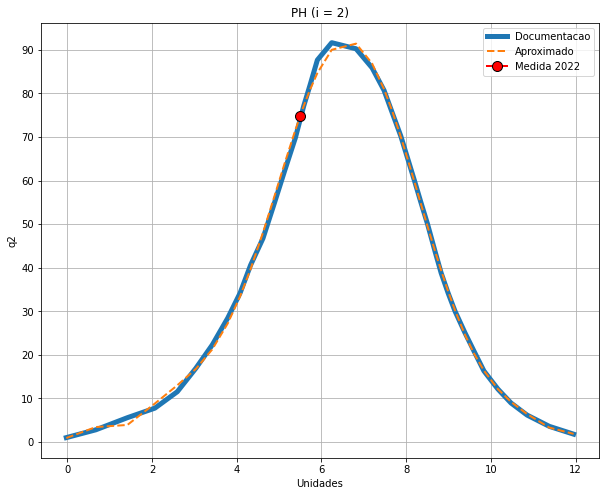

In [9]:
z, p = aproxima(X_pH, Y_pH, 10)

q2_list = []
qPH_list = [7.45, 7.34, 7.03, 7.03, 7.09, 7.08, 7.12, 6.9, 7.2, 7.0, 5.5]

for i in qPH_list:
    q2_list.append(function(i, z))

plot_function(X_pH, Y_pH, "PH (i = 2)", "Unidades", "q2", qPH_list[-1], q2_list[-1], p)

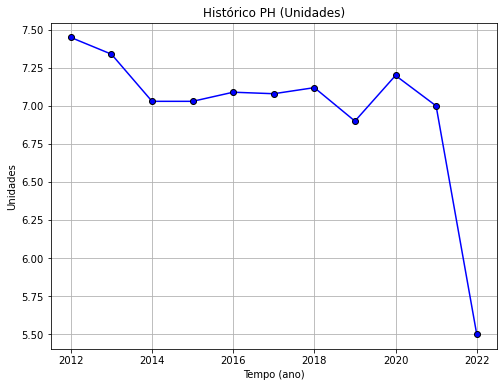

In [10]:
plot_historico_parametro(
    tempo, qPH_list, "Tempo (ano)", "Unidades", "Histórico PH (Unidades)", "b"
)

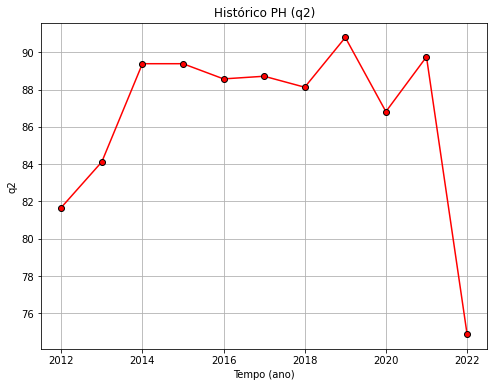

In [11]:
plot_historico_parametro(tempo, q2_list, "Tempo (ano)", "q2", "Histórico PH (q2)", "r")

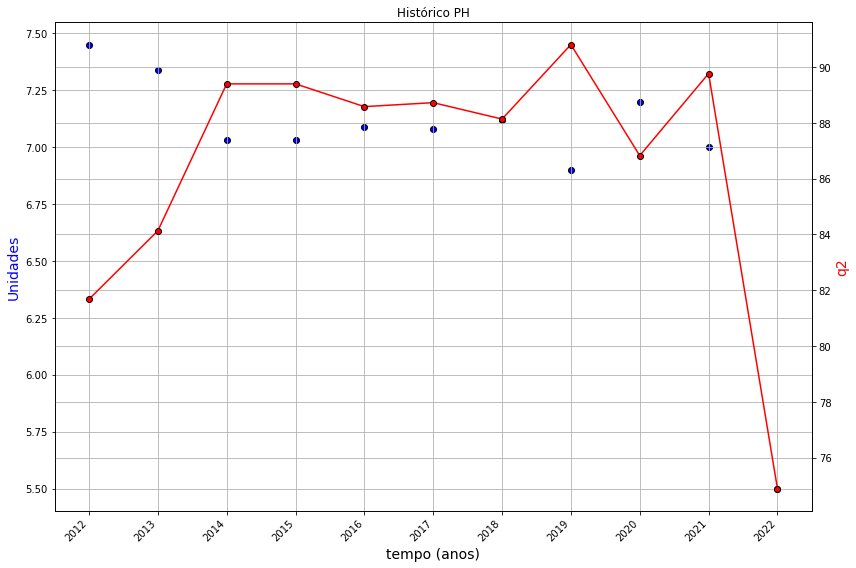

In [12]:
plot_historico_total(tempo, qPH_list, q2_list, "Unidades", "q2", "Histórico PH")

## Demanda Bioquímica de Oxigênio - DBO (i = 3)
---

In [13]:
df_DBO = pd.read_csv("DBO.csv", names=["X", "Y"])

X_DBO = list(df_DBO["X"])
Y_DBO = list(df_DBO["Y"])

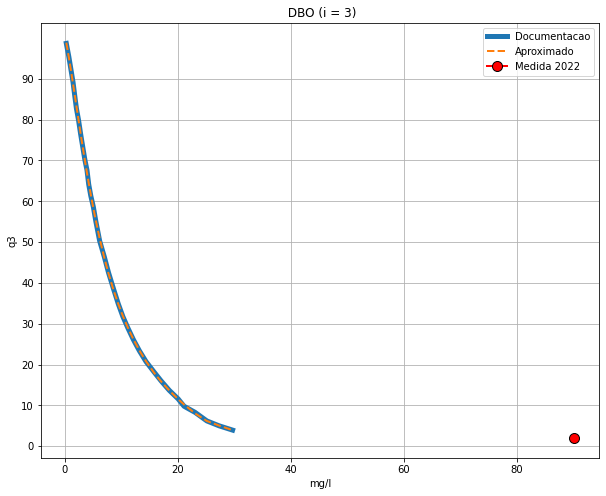

In [14]:
z, p = aproxima(X_DBO, Y_DBO, 8)

q3_list = []
qDBO_list = [16.0, 30.0, 45.0, 59.0, 18.0, 54.0, 50.0, 68.0, 17.5, 36.2, 90]

for i in qDBO_list:
    q3_list.append(function(i, z))

# Nota : se DBO5 > 30,0, q3 = 2,0
# Corrigindo :

for i, j in enumerate(qDBO_list):
    if j > 30:
        q3_list[i] = 2.0

plot_function(X_DBO, Y_DBO, " DBO (i = 3)", "mg/l", "q3", qDBO_list[-1], q3_list[-1], p)

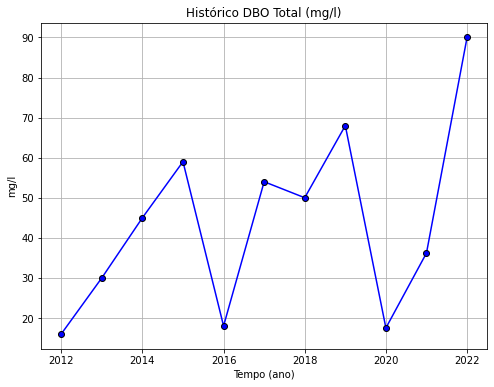

In [15]:
plot_historico_parametro(
    tempo, qDBO_list, "Tempo (ano)", "mg/l", "Histórico DBO Total (mg/l)", "b"
)

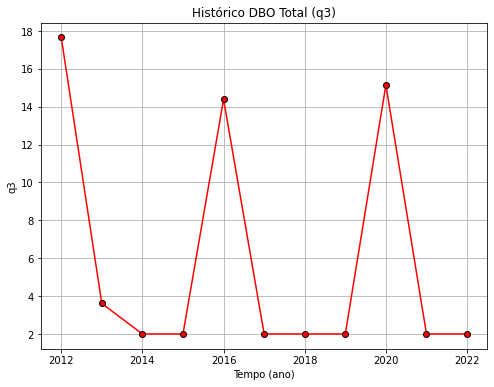

In [16]:
plot_historico_parametro(
    tempo, q3_list, "Tempo (ano)", "q3", "Histórico DBO Total (q3)", "r"
)

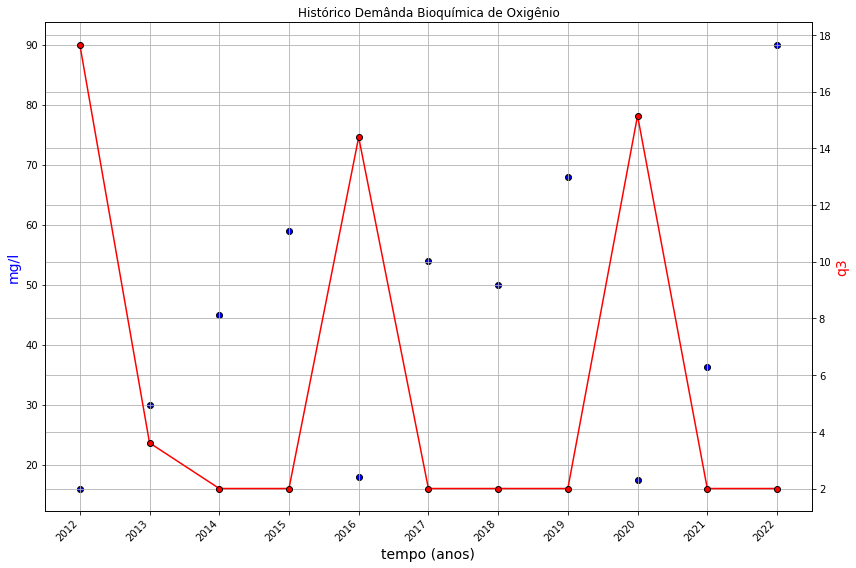

In [17]:
plot_historico_total(
    tempo, qDBO_list, q3_list, "mg/l", "q3", "Histórico Demânda Bioquímica de Oxigênio"
)

## Nitrogênio Total (i = 4)

---

In [18]:
df_Nitrogenio = pd.read_csv("Nitrogenio.csv", names=["X", "Y"])

X_Nitrogenio = list(df_Nitrogenio["X"])
Y_Nitrogenio = list(df_Nitrogenio["Y"])

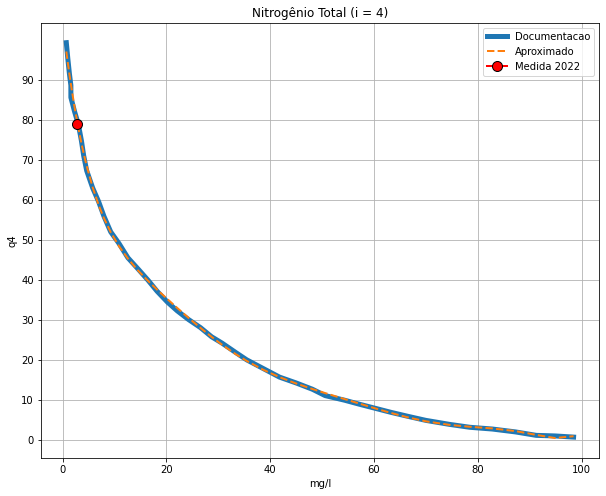

In [19]:
z, p = aproxima(X_Nitrogenio, Y_Nitrogenio, 8)

q4_list = []
qNitrogenio_list = [7.6, 11.0, 19.9, 23.2, 29.3, 20.90, 21.0, 29.4, 18.11, 20.31, 2.87]

for i in qNitrogenio_list:
    q4_list.append(function(i, z))

plot_function(
    X_Nitrogenio,
    Y_Nitrogenio,
    "Nitrogênio Total (i = 4)",
    "mg/l",
    "q4",
    qNitrogenio_list[-1],
    q4_list[-1],
    p,
)

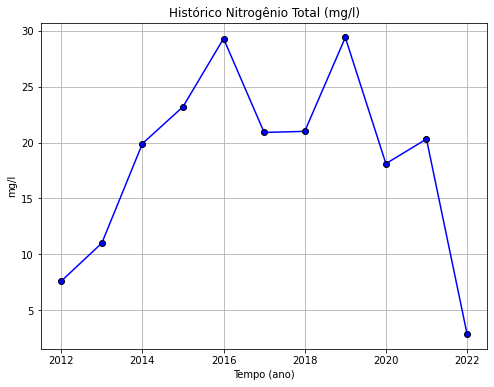

In [20]:
plot_historico_parametro(
    tempo,
    qNitrogenio_list,
    "Tempo (ano)",
    "mg/l",
    "Histórico Nitrogênio Total (mg/l)",
    "b",
)

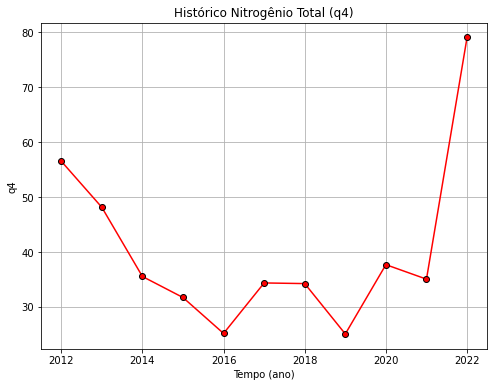

In [21]:
plot_historico_parametro(
    tempo, q4_list, "Tempo (ano)", "q4", "Histórico Nitrogênio Total (q4)", "r"
)

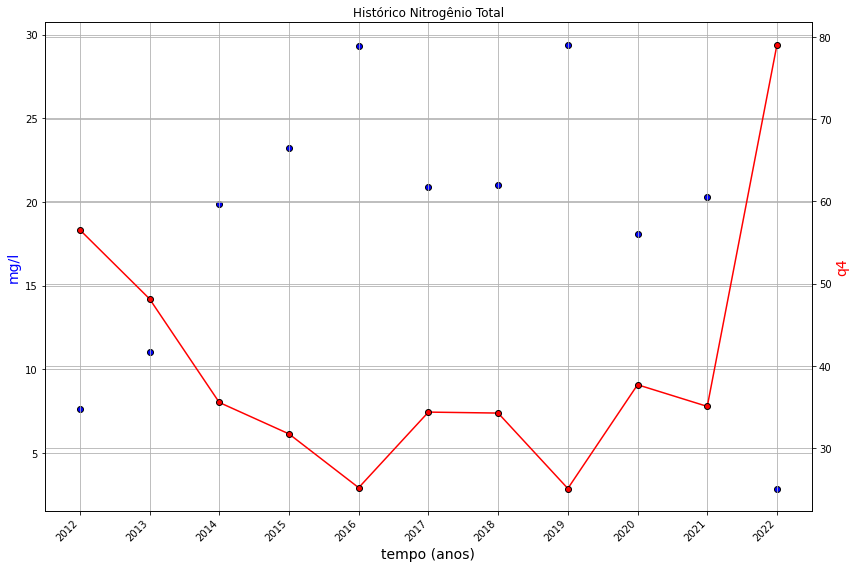

In [22]:
plot_historico_total(
    tempo, qNitrogenio_list, q4_list, "mg/l", "q4", "Histórico Nitrogênio Total"
)

## Fósforo Total (i = 5)

---

In [23]:
df_Fosforo = pd.read_csv("Fosforo.csv", names=["X", "Y"])

X_Fosforo = list(df_Fosforo["X"])
Y_Fosforo = list(df_Fosforo["Y"])

In [24]:
z, p = aproxima(X_Fosforo, Y_Fosforo, 8)

q5_list = []
qFosforo_list = [0.49, 0.94, 1.93, 2.24, 0.54, 1.7, 1.99, 3.21, 1.57, 1.84, 3.52]

for i in qFosforo_list:
    q5_list.append(function(i, z))

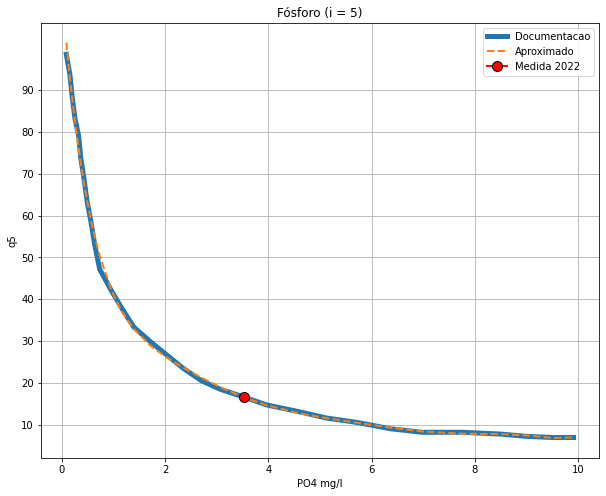

In [25]:
plot_function(
    X_Fosforo,
    Y_Fosforo,
    "Fósforo (i = 5)",
    "PO4 mg/l",
    "q5",
    qFosforo_list[-1],
    q5_list[-1],
    p,
)

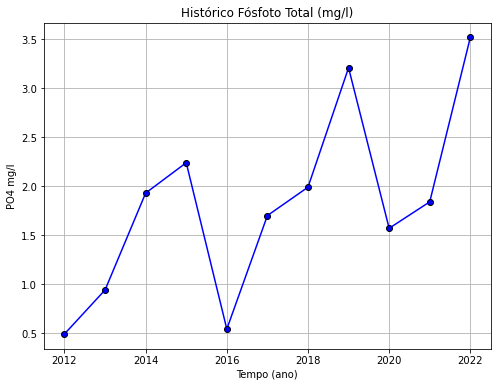

In [26]:
plot_historico_parametro(
    tempo,
    qFosforo_list,
    "Tempo (ano)",
    "PO4 mg/l",
    "Histórico Fósfoto Total (mg/l)",
    "b",
)

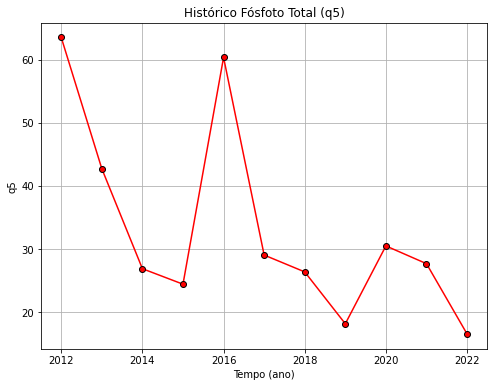

In [27]:
plot_historico_parametro(
    tempo, q5_list, "Tempo (ano)", "q5", "Histórico Fósfoto Total (q5)", "r"
)

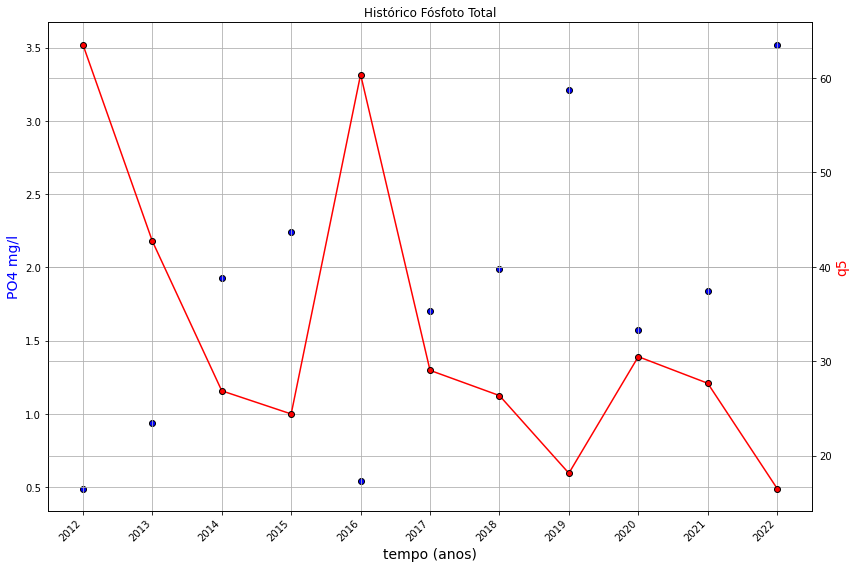

In [28]:
plot_historico_total(
    tempo, qFosforo_list, q5_list, "PO4 mg/l", "q5", "Histórico Fósfoto Total"
)

## Temperatura (i = 6)

---

In [29]:
df_Temperatura = pd.read_csv("Temperatura.csv", names=["X", "Y"])

x_temp = list(df_Temperatura["X"])
y_temp = list(df_Temperatura["Y"])

In [30]:
z, p = aproxima(x_temp, y_temp, np.log(len(x_temp)) ** 2)

In [31]:
q6_list = []
qtemp_list = [2.2, 1.1, 2.4, 0.2, 0.63, 1.9, 3.3, 1.6, 2.5, 0, 5]

for i in qtemp_list:
    q6_list.append(function(i, z))

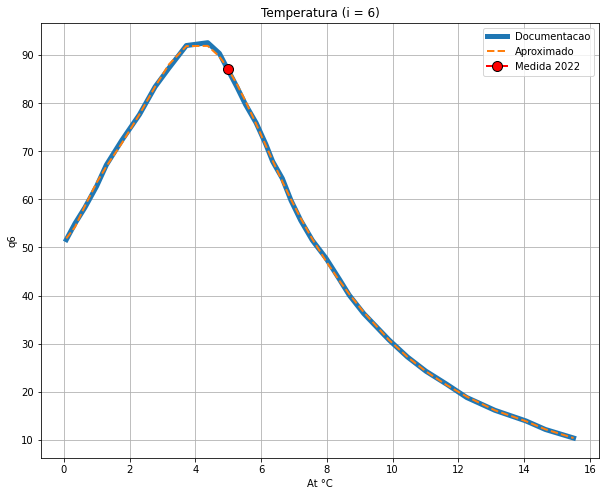

In [32]:
plot_function(
    x_temp, y_temp, "Temperatura (i = 6)", "At °C", "q6", qtemp_list[-1], q6_list[-1], p
)

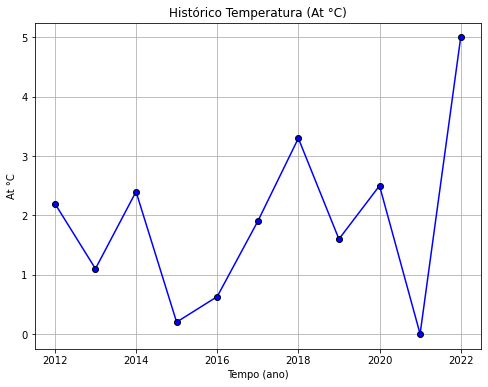

In [33]:
plot_historico_parametro(
    tempo, qtemp_list, "Tempo (ano)", "At °C", "Histórico Temperatura (At °C)", "b"
)

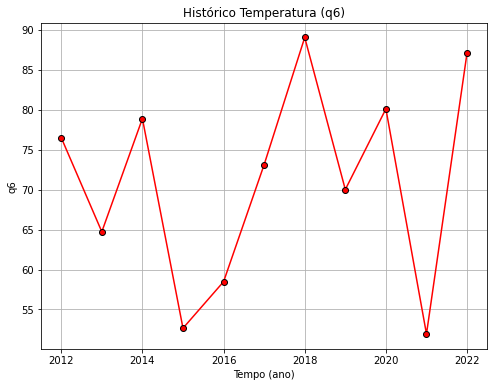

In [34]:
plot_historico_parametro(
    tempo, q6_list, "Tempo (ano)", "q6", "Histórico Temperatura (q6)", "r"
)

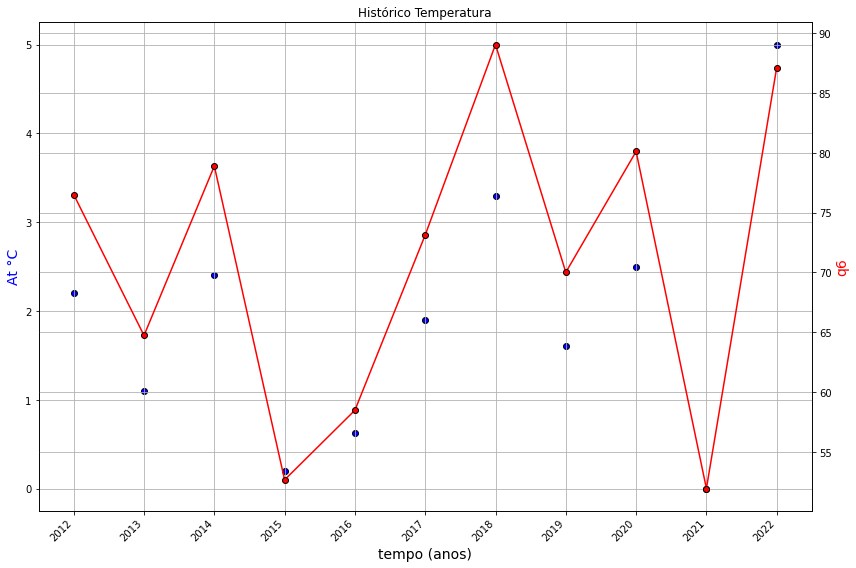

In [35]:
plot_historico_total(tempo, qtemp_list, q6_list, "At °C", "q6", "Histórico Temperatura")

### Turbidez (i = 7)

---

In [36]:
df_Turbidez = pd.read_csv("Turbidez.csv", names=["X", "Y"])

X_Turbidez = list(df_Turbidez["X"])
Y_Turbidez = list(df_Turbidez["Y"])

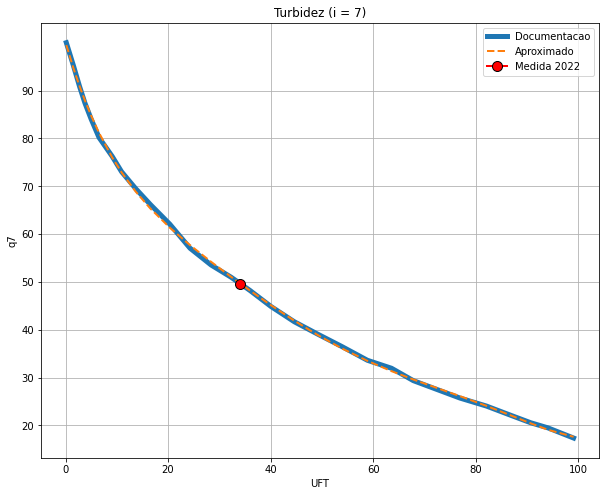

In [37]:
z, p = aproxima(X_Turbidez, Y_Turbidez, 6)

q7_list = []
qTurbidez_list = [76.9, 18.8, 37.9, 47.7, 38.2, 42.0, 37.0, 66.4, 30.9, 31, 34.07]

for i in qTurbidez_list:
    q7_list.append(function(i, z))

plot_function(
    X_Turbidez,
    Y_Turbidez,
    "Turbidez (i = 7)",
    "UFT",
    "q7",
    qTurbidez_list[-1],
    q7_list[-1],
    p,
)

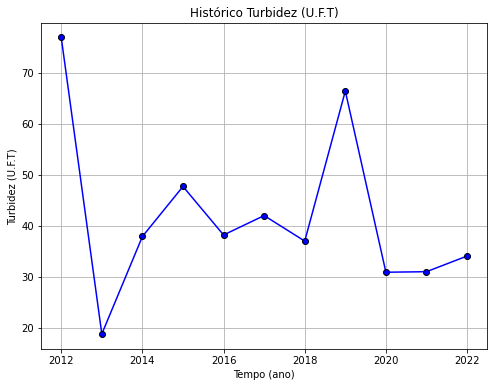

In [38]:
plot_historico_parametro(
    tempo,
    qTurbidez_list,
    "Tempo (ano)",
    "Turbidez (U.F.T)",
    "Histórico Turbidez (U.F.T)",
    "b",
)

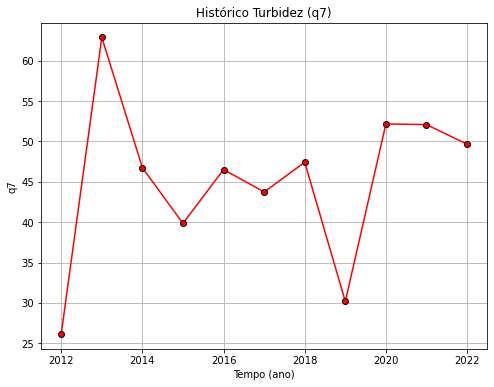

In [39]:
plot_historico_parametro(
    tempo, q7_list, "Tempo (ano)", "q7", "Histórico Turbidez (q7)", "r"
)

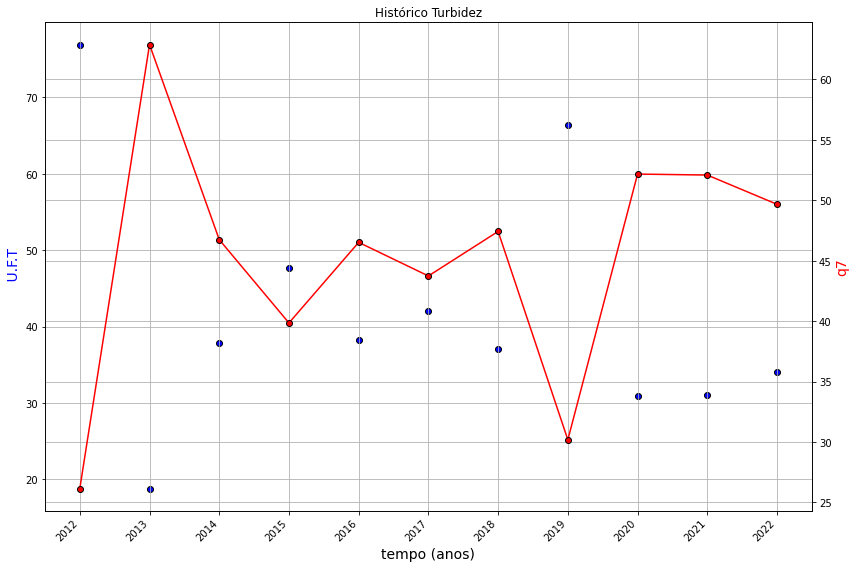

In [40]:
plot_historico_total(
    tempo, qTurbidez_list, q7_list, " U.F.T", "q7", "Histórico Turbidez"
)

### Resíduos Totais (i = 8)

---

In [41]:
df_Residuos = pd.read_csv("ResiduosTotais.csv", names=["X", "Y"])

X_Residuos = list(df_Residuos["X"])
Y_Residuos = list(df_Residuos["Y"])

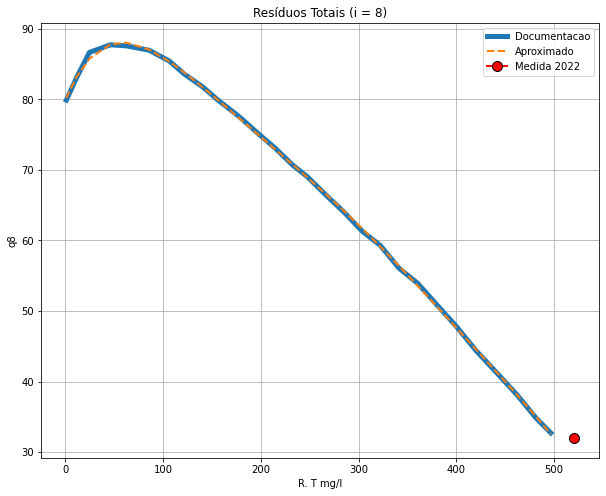

In [42]:
z, p = aproxima(X_Residuos, Y_Residuos, 6)

q8_list = []
qResiduos_list = [260, 190, 296, 306, 158, 258, 276, 362, 262, 254, 520]

for i in qResiduos_list:
    q8_list.append(function(i, z))


# Nota: se R. T. > 500. q8 = 32.0
# Corrigindo :
q8_list[-1] = 32

plot_function(
    X_Residuos,
    Y_Residuos,
    "Resíduos Totais (i = 8)",
    "R. T mg/l",
    "q8",
    qResiduos_list[-1],
    q8_list[-1],
    p,
)

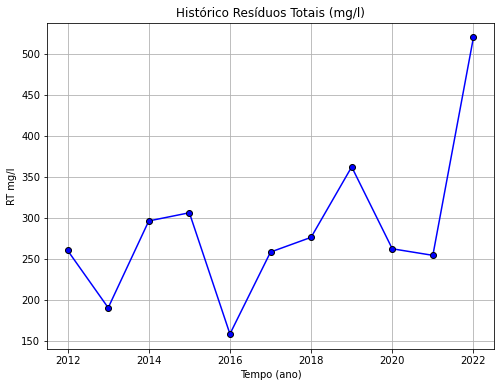

In [43]:
plot_historico_parametro(
    tempo,
    qResiduos_list,
    "Tempo (ano)",
    "RT mg/l",
    "Histórico Resíduos Totais (mg/l)",
    "b",
)

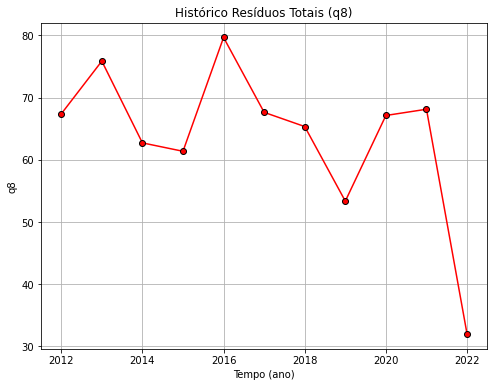

In [44]:
plot_historico_parametro(
    tempo, q8_list, "Tempo (ano)", "q8", "Histórico Resíduos Totais (q8)", "r"
)

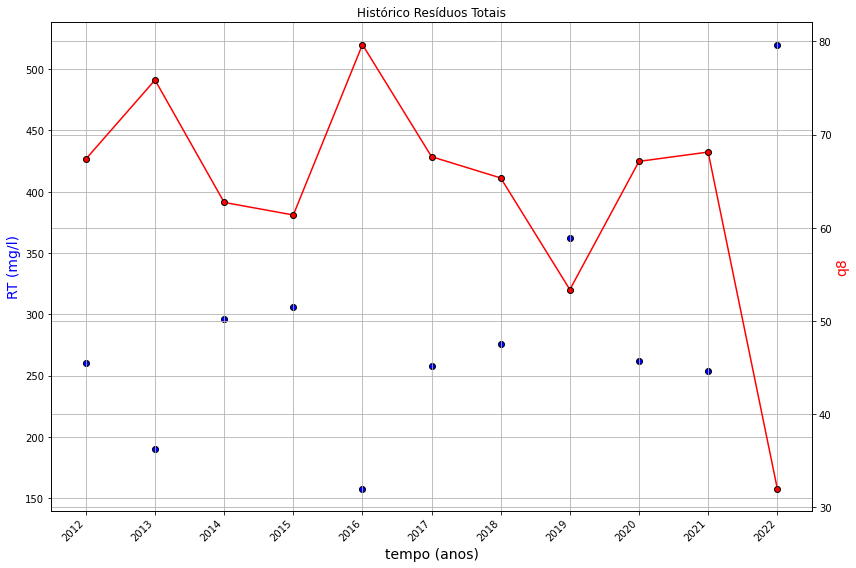

In [45]:
plot_historico_total(
    tempo, qResiduos_list, q8_list, "RT (mg/l)", "q8", "Histórico Resíduos Totais"
)

### Oxigênio Dissolvido (i = 9)

---

In [46]:
df_OD = pd.read_csv("OD.csv", names=["X", "Y"])

X_OD = list(df_OD["X"])
Y_OD = list(df_OD["Y"])

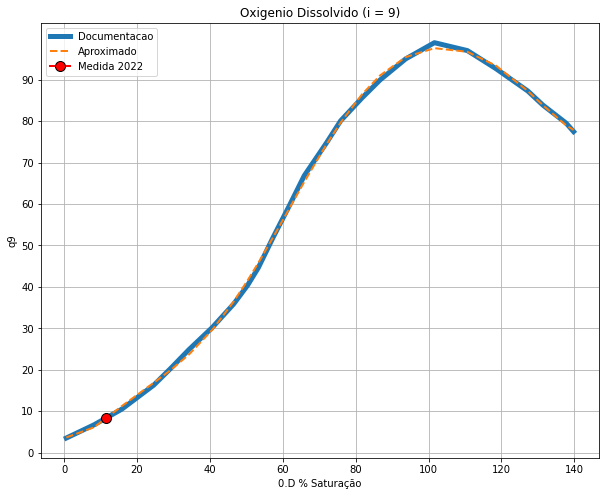

In [47]:
z, p = aproxima(X_OD, Y_OD, 8)

q9_list = []
qOD_list = [2.54, 11.38, 2.54, 6.41, 8.47, 5.93, 24.57, 2.54, 3.99, 8.47, 11.5]

for i in qOD_list:
    q9_list.append(function(i, z))

plot_function(
    X_OD,
    Y_OD,
    "Oxigenio Dissolvido (i = 9)",
    "0.D % Saturação",
    "q9",
    qOD_list[-1],
    q9_list[-1],
    p,
)

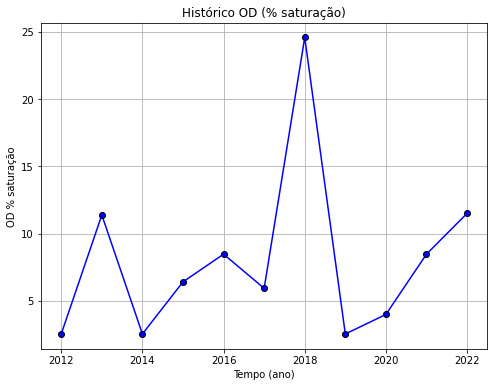

In [48]:
plot_historico_parametro(
    tempo, qOD_list, "Tempo (ano)", "OD % saturação", "Histórico OD (% saturação)", "b"
)

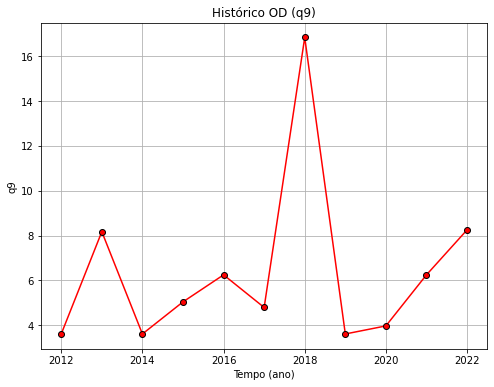

In [49]:
plot_historico_parametro(tempo, q9_list, "Tempo (ano)", "q9", "Histórico OD (q9)", "r")

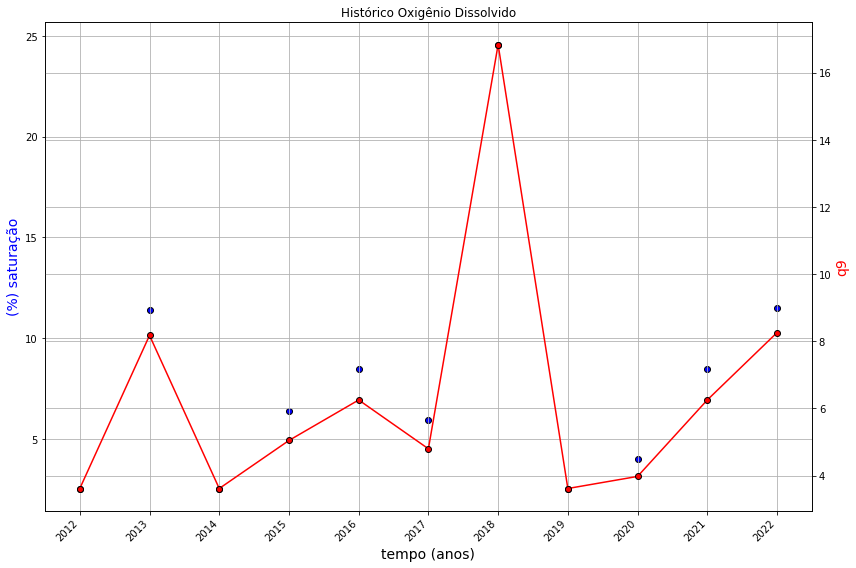

In [50]:
plot_historico_total(
    tempo, qOD_list, q9_list, "(%) saturação", "q9", "Histórico Oxigênio Dissolvido"
)

# IQA - Histórico

---

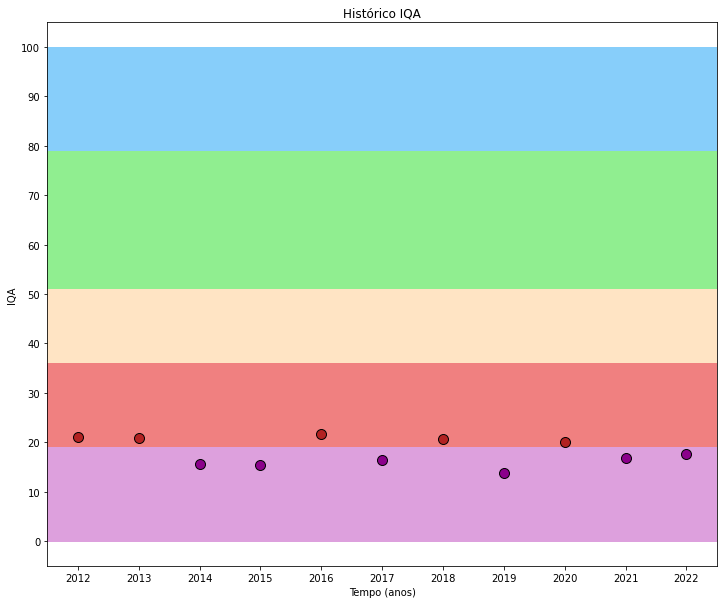

In [66]:
iqa_list = [21.09, 20.90, 15.70, 15.40, 21.71, 16.41, 20.58, 13.75, 20.14, 16.81, 17.55]

plt.figure(figsize=(12, 10))

for i in range(len(iqa_list)):

    if iqa_list[i] < 19:
        color = "darkmagenta"
    else:
        color = "firebrick"

    plt.plot(tempo[i], iqa_list[i], marker="o", markeredgecolor="k", ms=10, color=color)

plt.title("Histórico IQA")
plt.xlabel("Tempo (anos)")
plt.ylabel("IQA")

plt.xticks(np.arange(2012, 2023, 1))


plt.axhspan(79, 100, xmin=0, xmax=2023, color="lightskyblue")
plt.axhspan(51, 79, xmin=0, xmax=2023, color="lightgreen")
plt.axhspan(36, 51, xmin=0, xmax=2023, color="bisque")
plt.axhspan(19, 36, xmin=0, xmax=2023, color="lightcoral")
plt.axhspan(0, 19, xmin=0, xmax=2023, color="plum")

plt.yticks(np.arange(0, 110, 10))
plt.show()